In [1]:
# keras model 
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# pre-process iris class
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("Set2"))
sns.set_context('notebook', font_scale=1.25, rc={"lines.linewidth": 3})


import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.
c:\users\chuan\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\chuan\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\chuan\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

In [2]:
iris = pd.read_csv('iris.csv')
x = iris.iloc[:, 1:5]
y = iris['Species']
# encode y to integer
encoder = LabelEncoder()
encoded_y = encoder.fit(y).transform(y)
# convert int to one hot encoded array
onehot_y = np_utils.to_categorical(encoded_y)

In [11]:
def keras_model(hidden_act, output_act, lr=0.1):
    model = Sequential()
    model.add(Dense(4, input_dim=4, activation=hidden_act))
    model.add(Dense(3, activation=output_act))
    sgd = SGD(lr=lr)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

## Split Model for train and test

In [12]:
train_ind = list(range(0, 40)) + list(range(50, 90)) + list(range(90, 140))
test_ind = list(range(40, 50)) + list(range(90, 100)) + list(range(140, 150))
train_ind = np.array(train_ind)
test_ind = np.array(test_ind)

In [13]:
x_train = x.iloc[train_ind]
y_train = np.take(onehot_y, train_ind, axis=0)
x_test = x.iloc[test_ind]
y_test = np.take(onehot_y, test_ind,axis=0)

## Train Model

In [19]:
max_epochs = 500
model = keras_model('sigmoid', 'sigmoid', lr=0.01)
h = model.fit(x_train, y_train, epochs=max_epochs, verbose=0, batch_size=1)

Text(0, 0.5, 'accuracy')

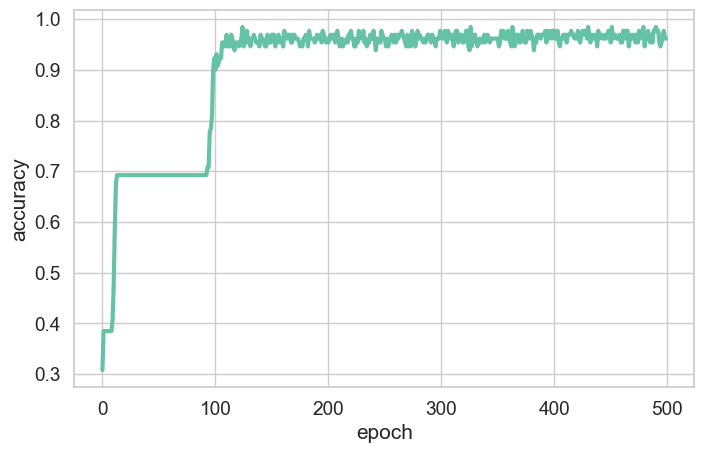

In [20]:
fig = plt.figure(figsize=(8, 5), dpi=100)
sns.lineplot(np.arange(max_epochs), h.history['acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')

Text(0, 0.5, 'loss')

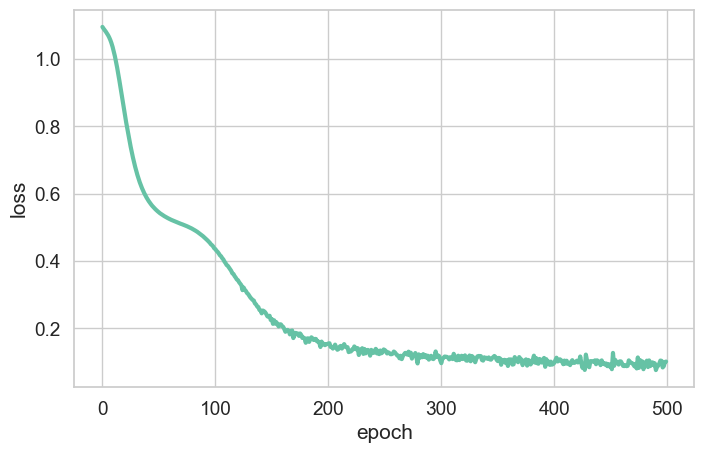

In [21]:
fig = plt.figure(figsize=(8, 5), dpi=100)
sns.lineplot(np.arange(max_epochs), h.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

## test model

In [17]:
np.round(model.predict_proba(x_test), 2)

array([[0.25, 0.  , 0.  ],
       [0.2 , 0.  , 0.  ],
       [0.24, 0.  , 0.  ],
       [0.23, 0.  , 0.  ],
       [0.23, 0.  , 0.  ],
       [0.24, 0.  , 0.  ],
       [0.25, 0.  , 0.  ],
       [0.24, 0.  , 0.  ],
       [0.25, 0.  , 0.  ],
       [0.25, 0.  , 0.  ],
       [0.  , 0.08, 0.02],
       [0.  , 0.15, 0.01],
       [0.  , 0.22, 0.  ],
       [0.  , 0.22, 0.  ],
       [0.  , 0.15, 0.01],
       [0.  , 0.22, 0.  ],
       [0.  , 0.19, 0.  ],
       [0.  , 0.23, 0.  ],
       [0.  , 0.18, 0.  ],
       [0.  , 0.2 , 0.  ],
       [0.  , 0.01, 0.42],
       [0.  , 0.02, 0.26],
       [0.  , 0.01, 0.41],
       [0.  , 0.01, 0.43],
       [0.  , 0.01, 0.43],
       [0.  , 0.02, 0.37],
       [0.  , 0.02, 0.36],
       [0.  , 0.02, 0.32],
       [0.  , 0.01, 0.41],
       [0.  , 0.02, 0.35]], dtype=float32)

In [23]:
h.history['acc'][-1], h.history['loss'][-1]

(0.9615384615384616, 0.10127939926818587)

In [18]:
model.evaluate(x_test, y_test, verbose=1)

30/30 [==============================] - 0s 967us/step


[0.03253008425235748, 1.0]